<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-data-scrapped-in-previous-notebook" data-toc-modified-id="Reading-data-scrapped-in-previous-notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading data scrapped in previous notebook</a></span><ul class="toc-item"><li><span><a href="#Removing-odd-cases-of-properties-outside-of-Warsaw" data-toc-modified-id="Removing-odd-cases-of-properties-outside-of-Warsaw-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Removing odd cases of properties outside of Warsaw</a></span></li></ul></li><li><span><a href="#Basic-data-visualization" data-toc-modified-id="Basic-data-visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic data visualization</a></span><ul class="toc-item"><li><span><a href="#Visualizing-unit-price-(PLN/m2)-for-each-offer-as-scatter-plot" data-toc-modified-id="Visualizing-unit-price-(PLN/m2)-for-each-offer-as-scatter-plot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Visualizing unit price (PLN/m2) for each offer as scatter plot</a></span></li><li><span><a href="#Grouping-offers-to-create-a-grid" data-toc-modified-id="Grouping-offers-to-create-a-grid-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Grouping offers to create a grid</a></span></li><li><span><a href="#Experimenting-with-other-viz-Types" data-toc-modified-id="Experimenting-with-other-viz-Types-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Experimenting with other viz Types</a></span><ul class="toc-item"><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#Surface-plot" data-toc-modified-id="Surface-plot-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Surface plot</a></span></li><li><span><a href="#Contour-plot" data-toc-modified-id="Contour-plot-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Contour plot</a></span></li></ul></li></ul></li><li><span><a href="#Advanced-visualization" data-toc-modified-id="Advanced-visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Advanced visualization</a></span><ul class="toc-item"><li><span><a href="#Initial-approach-to-grid-based-choropleth-map" data-toc-modified-id="Initial-approach-to-grid-based-choropleth-map-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Initial approach to grid based choropleth map</a></span></li><li><span><a href="#Clustering-similar-properties-into-irregular-areas" data-toc-modified-id="Clustering-similar-properties-into-irregular-areas-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Clustering similar properties into irregular areas</a></span></li><li><span><a href="#Countour-plot-with-geojson" data-toc-modified-id="Countour-plot-with-geojson-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Countour plot with geojson</a></span></li><li><span><a href="#Could-we-make-contour-plot-look-better-with-interpolation-of-point?" data-toc-modified-id="Could-we-make-contour-plot-look-better-with-interpolation-of-point?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Could we make contour plot look better with interpolation of point?</a></span></li></ul></li></ul></div>

In [665]:
import os
from urllib.request import urlretrieve
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import json
import numpy as np
import timeit 
from datetime import datetime

In [666]:
import plotly.express as px
from shapely.geometry import Polygon, MultiPolygon
import geopandas as gpd

In [667]:
# Cufflinks wrapper on plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme

import plotly.figure_factory as ff

import plotly.graph_objects as go

# Reading data scrapped in previous notebook

In [668]:
df=pd.read_excel("Warsaw_RE_data.xlsx")

In [669]:
df.columns

Index(['Unnamed: 0', 'Id', 'Area', 'Price', 'latitude', 'longitude',
       'build_year', 'building_floors_num', 'rooms_num', 'floors_num', 'City',
       'district', 'market', 'Building_material', 'Building_ownership',
       'Building_type', 'Construction_status', 'floor_no', 'Heating',
       'Windows_type', 'Equipment_types_dishwasher', 'Equipment_types_fridge',
       'Equipment_types_furniture', 'Equipment_types_oven',
       'Equipment_types_stove', 'Equipment_types_tv',
       'Equipment_types_washing_machine', 'Extras_types_air_conditioning',
       'Extras_types_attic', 'Extras_types_balcony', 'Extras_types_basement',
       'Extras_types_garage', 'Extras_types_garden', 'Extras_types_lift',
       'Extras_types_separate_kitchen', 'Extras_types_terrace',
       'Extras_types_two_storey', 'Extras_types_usable_room',
       'Media_types_cable-television', 'Media_types_electricity',
       'Media_types_internet', 'Media_types_phone', 'Media_types_sewage',
       'Media_types_wate

In [670]:
df.shape

(11939, 50)

## Removing odd cases of properties outside of Warsaw

In [671]:
df=df.query("City=='warszawa'")
df=df.query("latitude>52 and latitude<53")
df=df.query("longitude>20 and longitude<21.2")

In [672]:
df.shape

(11884, 50)

In [673]:
df.groupby("district", as_index=False).count()[["district","Id"]].sort_values(by="Id",ascending=False).head(10)

district    Id
115            Wola  1312
44          Mokotów  1185
126     Śródmieście   903
4         Białołęka   851
70   Praga-Południe   662
3            Bemowo   587
106           Ursus   498
107         Ursynów   425
112         Wilanów   425
120          Włochy   410

In [674]:
df["unit_price"]=df.Price/df.Area
df["unit_price"]=df.unit_price.apply(lambda x:int(x))

# Basic data visualization

In [675]:
data=[]
trace0=dict(
            lat=df.latitude,
            lon=df.longitude,
          
            type="scattermapbox",
            mode='markers',
            marker=dict(
                opacity=0.5, 
                size=10, 
                color=df.unit_price,
               
                colorscale="jet",
                cauto=False,
                cmax=20000,
                showscale=True),
                text=df.unit_price,
            
           
            )



data=[trace0]

layout = dict(
    
   
    
    title="Sample size by Production year and condition",
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 0, b = 0, l = 0, r = 0),
    font = dict(color = '#FFFFFF', size = 11),
    paper_bgcolor = '#000000',
    mapbox = dict(
        
        # here you need the token from Mapbox
        accesstoken ="pk.eyJ1IjoiamFubWFqZXdza2kiLCJhIjoiY2p1bnRkN2JiMTFuczRjbXFuaDg0YWswZSJ9.LICCkkSfzPTXlNZ3MC-HHg",
        bearing = 0,
        # where we want the map to be centered
        center = dict(
            lat = 52.2,
            lon = 21
        ),
        # we want the map to be "parallel" to our screen, with no angle
        pitch = 0,
        # default level of zoom
        zoom = 10,
        # default map style
        style = 'light'
    )

)

figure=dict(
    data=data,
    layout=layout,
  
    )


## Visualizing unit price (PLN/m2) for each offer as scatter plot

In [676]:
iplot(figure)

## Grouping offers to create a grid

In [677]:
rounding_num=0.015 #roundign coordinates by chosen precision creates a grid
df["lon_mod"]=np.round(df.longitude/rounding_num,0)*rounding_num


df["lat_mod"]=np.round(df.latitude/rounding_num,0)*rounding_num


In [678]:
data=[]
trace0=dict(
            lat=df.lat_mod,
            lon=df.lon_mod,
          
            type="scattermapbox",
            mode='markers',
            marker=dict(
                opacity=0.5, 
                size=10, 
                color=df.unit_price,
               
                colorscale="jet",
                cauto=False,
                cmax=20000,
                showscale=True),
                text=df.unit_price,
            
           
            )



data=[trace0]

layout = dict(
    
   
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 0, b = 0, l = 0, r = 0),
    font = dict(color = '#FFFFFF', size = 11),
    paper_bgcolor = '#000000',
    mapbox = dict(
        # here you need the token from Mapbox
        accesstoken ="pk.eyJ1IjoiamFubWFqZXdza2kiLCJhIjoiY2p1bnRkN2JiMTFuczRjbXFuaDg0YWswZSJ9.LICCkkSfzPTXlNZ3MC-HHg",
        bearing = 0,
        # where we want the map to be centered
        center = dict(
            lat = 52.2,
            lon = 21
        ),
        # we want the map to be "parallel" to our screen, with no angle
        pitch = 0,
        # default level of zoom
        zoom = 10,
        # default map style
        style = 'light'
    )
)

figure=dict(
    data=data,
    layout=layout
    )
iplot(figure)

## Experimenting with other viz Types

In [679]:
df_piv=df.pivot_table(index="lat_mod",columns="lon_mod",values="unit_price",aggfunc=np.mean)

In [680]:
arr=df_piv.values

In [681]:
df_piv.columns.shape

(25,)

In [682]:
df_piv.index.shape

(21,)

### Heatmap

In [683]:
fig = go.Figure(data=go.Heatmap(
                   z=df_piv.values,
                   y=df_piv.index,
                   x=df_piv.columns,
                 ))
fig.show()

### Surface plot

In [684]:
trace0=go.Surface(
        z=df_piv.values,
        y=df_piv.index,
        x=df_piv.columns,
       connectgaps=True
          

        )

data=[trace0]

In [685]:
figure=go.Figure(
    data=data,
    layout=go.Layout(
      
        scene=dict(
            xaxis=dict(title="Longitude"),
            yaxis=dict(title="Latitude"),
            zaxis=dict(title="Price per m2")

           
                  ),
         title="Real estate price per m2 geo distribution"
    ))
iplot(figure)

### Contour plot

In [686]:
fig = go.Figure(data =
    go.Contour(
        z=df_piv.values,
        y=df_piv.index,
        x=df_piv.columns,
        connectgaps=True
    ))
fig.show()

# Advanced visualization

Scatter plots work well with maps, but they tend to be too crowded, on the other hand, the other surface plots are easier to read, but cannot be combined with a map using plotly. A choropleth map with custom created geojson object will probably be the best solution. 

In [687]:
df_map=df[["lat_mod","lon_mod","unit_price"]].groupby(["lat_mod","lon_mod"], as_index=False).mean()


In [688]:
df_map["sample"]=df[["lat_mod","lon_mod","Id"]].groupby(["lat_mod","lon_mod"], as_index=False).count().Id
df_map["district"]=df[["lat_mod","lon_mod","district"]].groupby(["lat_mod","lon_mod"], as_index=False).first().district

In [689]:
df_map["district"]=np.where(df_map.district.isna(),"Other",df_map.district)

In [690]:
df_map.head()

lat_mod  lon_mod  unit_price  sample district
0   52.080   20.955     11484.0       2  Jelonki
1   52.080   21.015      5842.0       1  Ursynów
2   52.095   20.985      4466.0       1     Pyry
3   52.095   21.030      6912.0       3  Ursynów
4   52.095   21.045      4887.0       1    Other

In [691]:
df_map.shape

(251, 5)

In [692]:
df_map=df_map.query("sample>3")
df_map.reset_index(inplace=True)

In [693]:
df_map.shape

(202, 6)

In [694]:
df_map["geo_Id"]=df_map.index

## Initial approach to grid based choropleth map

In [695]:
geo_list=[]

for i in range(0,df_map.shape[0]):
    point=df_map.iloc[i,:]
    geo_json={}
    geo_json["type"]="Feature"
    
    geo_json["properties"]={"District":point.district}
    
    geo_json["geometry"]={
        "type":"Polygon",
        "coordinates":[[[point.lon_mod+rounding_num/2,point.lat_mod+rounding_num/2],
                        [point.lon_mod-rounding_num/2,point.lat_mod+rounding_num/2],
                        [point.lon_mod-rounding_num/2,point.lat_mod-rounding_num/2],
                        [point.lon_mod+rounding_num/2,point.lat_mod-rounding_num/2]]]}
        
    geo_json["id"]=i
    
    geo_list.append(geo_json)


In [696]:
len(geo_list)

202

In [697]:
valid_geo_json=geo_list[0]

In [698]:
sub_districts={"type":"FeatureCollection","features":geo_list}

In [699]:
fig = px.choropleth_mapbox(df_map,
                    geojson=sub_districts, 
                    locations='geo_Id',
                    color='unit_price', 
                    color_continuous_scale="jet",


                    mapbox_style='open-street-map',
                    zoom=9, center={"lat": 52.2, "lon": 21},
                    opacity=0.6,
                    hover_name="district",
                    hover_data=["sample"]
                           

                           
                          )

fig.show()

## Clustering similar properties into irregular areas

In [700]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100, random_state=0)

In [701]:
kmeans.fit(df[["latitude","longitude"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [702]:
df["spatial_cluster"]=kmeans.predict(df[["latitude","longitude"]])

It seems that we can create geojson in a much easier way - using geopandas GeoSeries together with to_json function

In [703]:

geo_list=[]
crs = {'init': 'epsg:4326'}

for i in range(0,df.spatial_cluster.max()):
    df_cluster=df[df.spatial_cluster==i]
   
    lat_point_list=df_cluster.latitude
    lon_point_list=df_cluster.longitude

    try:
        polygon_geom = Polygon(zip(lon_point_list, lat_point_list))


        polygon = gpd.GeoDataFrame(index=[i], crs=crs, geometry=[polygon_geom])   
    
    



        shape=polygon.convex_hull

        geo_json=eval(shape.to_json())["features"][0]

        geo_list.append(geo_json)
    except:
        print("cluster {} has insufficient sample \n".format(i))
        continue
        
    

In [704]:
len(geo_list)

99

In [705]:
sub_districts2={"type":"FeatureCollection","features":geo_list}

In [706]:
df_cluster=df[["spatial_cluster","unit_price"]].groupby("spatial_cluster", as_index=False).mean()


In [707]:
df_cluster["sample"]=df[["spatial_cluster","Id"]].groupby("spatial_cluster", as_index=False).count().Id
df_cluster["district"]=df[["spatial_cluster","district"]].groupby("spatial_cluster", as_index=False).first().district
df_cluster.shape

(100, 4)

In [708]:
fig = px.choropleth_mapbox(df_cluster,
                    geojson=sub_districts2, 
                    locations='spatial_cluster',
                    color='unit_price', 
                    color_continuous_scale="jet",


                    mapbox_style='open-street-map',
                    zoom=9, center={"lat": 52.2, "lon": 21},
                    opacity=0.6,
                    hover_name="district",
                    hover_data=["sample"]
                           

                           
                          )

fig.show()

## Countour plot with geojson

In [709]:
import matplotlib.pyplot as plt

In [710]:
z=df_piv.values
y=df_piv.index
x=df_piv.columns

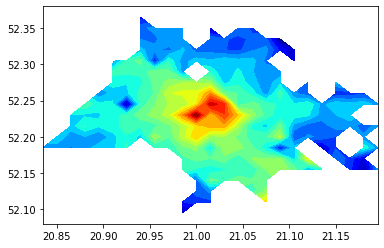

In [711]:
cs=plt.contourf(x,y,z,20,cmap="jet")

## Could we make contour plot look better with interpolation of point?

In [712]:
df_map.head()

index  lat_mod  lon_mod    unit_price  sample                district  \
0      6   52.110   21.000   6874.500000       4                 Ursynów   
1      7   52.110   21.015   6966.833333       6                    Pyry   
2     10   52.125   21.000   7451.000000       7  Śródmieście Południowe   
3     12   52.125   21.060  10753.583333      36                 Ursynów   
4     13   52.125   21.075  12189.650000      20                  Kabaty   

   geo_Id  
0       0  
1       1  
2       2  
3       3  
4       4

In [713]:
df_map.reset_index(inplace=True)

In [714]:
z=df_map.unit_price
y=df_map.lat_mod
x=df_map.lon_mod

In [715]:
from scipy.interpolate import griddata
from numpy import linspace

In [716]:
xi = linspace(x.min(),x.max(),100);
yi = linspace(y.min(),y.max(),100);
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

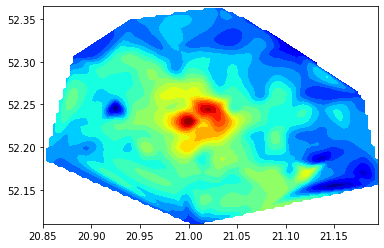

In [717]:
cs = plt.contourf(xi,yi,zi,20,cmap=plt.cm.jet)


In [718]:
import geojsoncontour

In [719]:
geojson = geojsoncontour.contourf_to_geojson(
    contourf=cs,
    ndigits=3,
   
)

In [728]:
arr_temp=np.ones([len(json_dict["features"]),2])

In [729]:
for i in range(0, len(json_dict["features"])):
    json_dict["features"][i]["id"]=i

    
    arr_temp[i,0]=i
    arr_temp[i,1]=float(json_dict["features"][i]["properties"]["title"])
    


In [730]:
df_contour=pd.DataFrame(arr_temp, columns=["Id","Price"])

In [731]:
fig = px.choropleth_mapbox(df_contour,
                    geojson=json_dict, 
                    locations='Id',
                    color='Price', 
                    color_continuous_scale="jet",


                    mapbox_style='open-street-map',

                    zoom=9, center={"lat": 52.2, "lon": 21},
                    opacity=0.4,
                    width=0,



                           
                          )

fig.show()

In [732]:
data = go.Figure(go.Choroplethmapbox(geojson=json_dict, locations=df_contour.Id, z=df_contour.Price,
                                    colorscale="jet", marker_line_width=1, marker_opacity=0.3))
layout = dict(
    
   
    
    title="Sample size by Production year and condition",
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 0, b = 0, l = 0, r = 0),
    font = dict(color = '#FFFFFF', size = 11),
    paper_bgcolor = '#000000',
    mapbox = dict(
        
        # here you need the token from Mapbox
        accesstoken ="pk.eyJ1IjoiamFubWFqZXdza2kiLCJhIjoiY2p1bnRkN2JiMTFuczRjbXFuaDg0YWswZSJ9.LICCkkSfzPTXlNZ3MC-HHg",
        bearing = 0,
        # where we want the map to be centered
        center = dict(
            lat = 52.2,
            lon = 21
        ),
        # we want the map to be "parallel" to our screen, with no angle
        pitch = 0,
        # default level of zoom
        zoom = 10,
        # default map style
        style = 'light'
    )

)

figure=dict(
    data=data,
    layout=layout,
  
    )

iplot(figure)